## Prediciendo quiebra de empresas

En esta práctica guiada vamos a trabajar en predecir la quiebra de empresas en Polonia. La información fue obtenida del Servicio de Información de Mercados Emergentes (EMIS por sus siglas en inglés), que es una base de datos que contiene información de los mercados emergentes alrededor del mundo. Las compañías en bancarrota fueron analizadas en el período 2000-2012, mientras que las que continuan operando se evaluaron desde 2007 a 2013.

En este caso sólo vamos a trabajar con el tercer año de los disponibles. Se puede consultar la página de UCI en donde se encuentra alojado <a href='https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data'> aqui </a> 

El dataset empleado tiene datos de las empresas y su estatus tres años después.

In [1]:
import sklearn
sklearn.__version__

'0.19.1'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("3year.csv")

In [3]:
df.head()

,Unnamed: 0,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.1225,1.1961,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,b'0'
1,1,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.1721,1.6018,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,b'0'
2,2,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.9881,1.0077,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,b'0'
3,3,0.024526,0.43236,0.27546,1.7833,-10.1050,0.56944,0.024526,1.3057,1.0509,...,0.048398,0.043445,0.95160,0.142980,4.2286,5.0528,98.783,3.6950,3.4844,b'0'
4,4,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.4094,1.3393,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,b'0'


In [4]:
df = df.drop("Unnamed: 0", axis = 1)

Acá hay una descripción de los atributos

X1 net profit / total assets

X2 total liabilities / total assets

X3 working capital / total assets

X4 current assets / short-term liabilities

X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

X6 retained earnings / total assets

X7 EBIT / total assets

X8 book value of equity / total liabilities

X9 sales / total assets

X10 equity / total assets

X11 (gross profit + extraordinary items + financial expenses) / total assets

X12 gross profit / short-term liabilities

X13 (gross profit + depreciation) / sales

X14 (gross profit + interest) / total assets

X15 (total liabilities * 365) / (gross profit + depreciation)

X16 (gross profit + depreciation) / total liabilities

X17 total assets / total liabilities

X18 gross profit / total assets

X19 gross profit / sales

X20 (inventory * 365) / sales

X21 sales (n) / sales (n-1)

X22 profit on operating activities / total assets

X23 net profit / sales

X24 gross profit (in 3 years) / total assets

X25 (equity - share capital) / total assets

X26 (net profit + depreciation) / total liabilities

X27 profit on operating activities / financial expenses

X28 working capital / fixed assets

X29 logarithm of total assets

X30 (total liabilities - cash) / sales

X31 (gross profit + interest) / sales

X32 (current liabilities * 365) / cost of products sold

X33 operating expenses / short-term liabilities

X34 operating expenses / total liabilities

X35 profit on sales / total assets

X36 total sales / total assets

X37 (current assets - inventories) / long-term liabilities

X38 constant capital / total assets

X39 profit on sales / sales

X40 (current assets - inventory - receivables) / short-term liabilities

X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))

X42 profit on operating activities / sales

X43 rotation receivables + inventory turnover in days

X44 (receivables * 365) / sales

X45 net profit / inventory

X46 (current assets - inventory) / short-term liabilities

X47 (inventory * 365) / cost of products sold

X48 EBITDA (profit on operating activities - depreciation) / total assets

X49 EBITDA (profit on operating activities - depreciation) / sales

X50 current assets / total liabilities

X51 short-term liabilities / total assets

X52 (short-term liabilities * 365) / cost of products sold)

X53 equity / fixed assets

X54 constant capital / fixed assets

X55 working capital

X56 (sales - cost of products sold) / sales

X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

X58 total costs /total sales

X59 long-term liabilities / equity

X60 sales / inventory

X61 sales / receivables

X62 (short-term liabilities *365) / sales

X63 sales / short-term liabilities

X64 sales / fixed assets

Transforme la clase en 0 y 1, para ello puede emplear LabelEncoder

In [5]:
y = df["class"]
X = df.drop("class", axis = 1)

In [6]:
print("el dataset tiene ", X.shape[0], " filas y ", X.shape[1], " columnas")

el dataset tiene  10503  filas y  64  columnas


In [7]:
from sklearn.preprocessing import LabelEncoder

Usamos LabelEncoder para transformar la clase en un array de 0 y 1

In [8]:
encoder = LabelEncoder()

In [9]:
y.head()

0    b'0'
1    b'0'
2    b'0'
3    b'0'
4    b'0'
Name: class, dtype: object

In [10]:
y = encoder.fit_transform(y)

In [11]:
y

array([0, 0, 0, ..., 1, 1, 1])

Hagamos un split en train y test.

In [12]:
from sklearn.model_selection import train_test_split

Con la información de train vamos a realizar la búsqueda de hiperparámetros y ajustar el mejor modelo.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

## Knn - Benchmark

Comencemos probando Knn, que será nuestro benchmark

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [15]:
model_knn = KNeighborsClassifier()

In [16]:
params = {"n_neighbors":list(range(3,8))}

In [17]:
knn = GridSearchCV(model_knn, params, verbose= True)

Imputamos los NA con 0

In [18]:
X_train_na = X_train.fillna(0)
X_test_na = X_test.fillna(0)

In [19]:
stds = StandardScaler()

In [20]:
X_train_knn = stds.fit_transform(X_train_na)

In [21]:
X_test_knn = stds.transform(X_test_na)

In [22]:
start = time.time()
knn.fit(X_train_knn, y_train)
end = time.time()
print("La búsqueda con knn llevó: ", end - start, " segundos")

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
La búsqueda con knn llevó:  52.132347106933594  segundos


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   52.1s finished


In [23]:
knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [24]:
y_predicted_knn = knn.predict_proba(X_test_knn)
knn_auc = roc_auc_score(y_test, y_predicted_knn[:,1])
print("El valor del AUC es: ", knn_auc)

El valor del AUC es:  0.5538863987517019


In [25]:
%matplotlib inline
plot_roc(y_test,y_predicted_knn, plot_micro = False, plot_macro= False);

NameError: name 'plot_roc' is not defined

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model_rf = RandomForestClassifier()

In [28]:
import scipy.stats as st

A RandomizedSearchCV los hiperparámetros se los podemos pasar como una lista o también como una distribución de scipy.

In [29]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12)     # Maximum tree depth for base learners.
}

In [30]:
rf = RandomizedSearchCV(model_rf,params, n_iter=25, verbose= True)

In [31]:
start = time.time()
rf.fit(X_train_na,y_train)
end = time.time()
print("La búsqueda con Random Forest llevó: ", end - start, " segundos")

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   46.1s finished


La búsqueda con Random Forest llevó:  47.39216995239258  segundos


In [32]:
rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
y_predicted_rf = rf.predict_proba(X_test_na)

In [34]:
rf_auc = roc_auc_score(y_test,y_predicted_rf[:,1])
print("El valor del AUC es: ", rf_auc)

El valor del AUC es:  0.8514402851504536


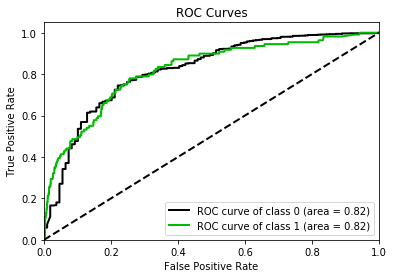

In [ ]:
%matplotlib inline
plot_roc(y_test,y_predicted_rf, plot_micro = False, plot_macro= False);

## Xgboost

Vamos a importar el clasificador XGBoost del módulo xgboost.sklearn que nos provee clases y métodos aceptados por la API de sklearn. La clase que contiene este clasificador se llama XGBClassifier

In [35]:
from xgboost.sklearn import XGBClassifier

In [36]:
model_xg = XGBClassifier(n_jobs=-1)

Podemos partir del siguiente conjunto de hiperparámetros, que serán empleados también luego.

In [37]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [38]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

Se puede consultar los parámetros <a = "http://xgboost.readthedocs.io/en/latest/python/python_api.html"> aquí </a> y <a = "https://github.com/dmlc/xgboost/blob/master/doc/parameter.md"> aquí </a>

Realizamos la búsqueda de hiperparámetrosRandomiezSearchCV con 25 iteraciones

In [39]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

Busco el mejor set de hiperparámetros y calculamos el tiempo

¿Es necesario normalizar los features antes de aplicar XGBoost?

In [40]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.1min finished


La búsqueda con XGBoost llevó:  126.94642210006714  segundos


In [41]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [42]:
y_predicted_xgb[:,0].shape

(2626,)

In [43]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.9158913246340008


Graficamos la curva ROC por clase

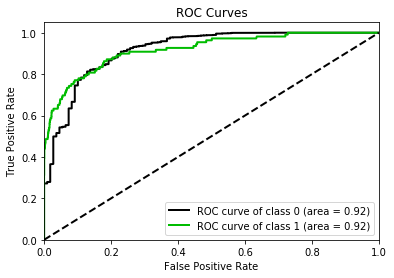

In [ ]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False);

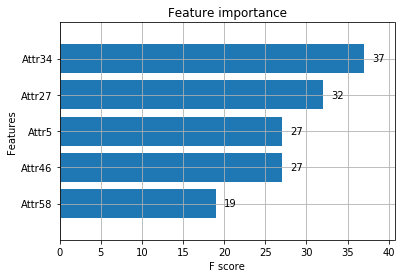

In [44]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

Entonces, los principales atributos son:
- profit on operating activities / financial expenses
- (current assets - inventory) / short-term liabilities
- sales (n) / sales (n-1)
- operating expenses / total liabilities
- logarithm of total assets

También se pueden acceder los valores directamente con el atributo feature_importances_

In [45]:
print(xgb.best_estimator_.feature_importances_)

[0.0140276  0.01802678 0.01695387 0.01436971 0.01931547 0.01311377
 0.01783989 0.         0.01344383 0.01539229 0.0178792  0.
 0.0180145  0.         0.01244943 0.01857431 0.         0.
 0.01660798 0.01762861 0.03156445 0.02045731 0.01649308 0.01141567
 0.01629866 0.01931716 0.03379915 0.01351264 0.01898925 0.01246218
 0.01807582 0.04017228 0.02183396 0.03782241 0.0176627  0.0160859
 0.01443429 0.01411872 0.01861381 0.01130148 0.01891212 0.0185985
 0.00759964 0.02325511 0.00627466 0.0154699  0.0144769  0.01266862
 0.03267356 0.01341039 0.01358116 0.01599135 0.0113432  0.
 0.01363688 0.03515581 0.01504647 0.01786895 0.00799618 0.01230962
 0.01747301 0.01719804 0.         0.01099185]


## LightGBM

La librería lightgbm permite directamente interactuar con SciKitLearn

In [46]:
import lightgbm as lgb

/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [47]:
model_lgb = lgb.LGBMClassifier()

 Usamos los mismos rangos de hiperparámetros que para XGBoost. La lista completa de hiperparámetros se puede consultar <a = "https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst"> aquí </a>

¿Es necesario normalizar los features antes de aplicar LightGBM?

In [48]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [49]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   15.1s finished


La búsqueda con LightGBM llevó:  15.399824142456055  segundos


In [50]:
print('Best parameters found by grid search are:', lgbm.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.7201413923358964, 'gamma': 1.7703038411839134, 'learning_rate': 0.16595690496285015, 'max_depth': 8, 'min_child_weight': 2.7580296718104726, 'n_estimators': 36, 'reg_alpha': 0.9285644415036132, 'subsample': 0.9831676096746732}


In [51]:
opt_lgbm = lgbm.best_estimator_

In [52]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [53]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.9310743624653888


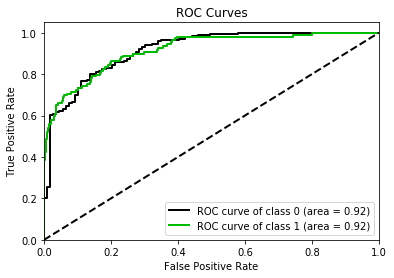

In [ ]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False);

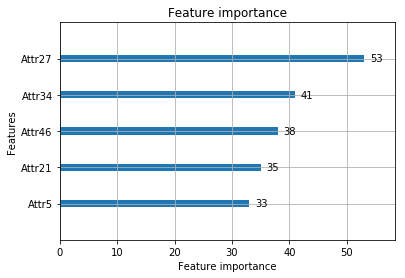

In [ ]:
lgb.plot_importance(lgbm.best_estimator_, max_num_features=5);

In [54]:
lgbm.best_estimator_.feature_importances_

array([ 5,  4,  8, 15, 37, 13,  5,  6, 23,  6,  4,  7, 18,  0, 22,  5,  4,
        1,  9, 11, 41, 11, 12, 26, 23, 13, 57, 16, 32, 15, 10, 21,  4, 47,
       14, 11, 12, 17, 27, 25, 21, 14,  9, 20, 16, 51, 14,  6, 12,  6,  5,
        9, 14,  6, 18, 30,  6, 39,  6, 22, 22,  3,  4, 14], dtype=int32)

## CatBoost

In [55]:
from catboost import CatBoostClassifier

In [56]:
model_cat = CatBoostClassifier()

¿Es necesario normalizar los features antes de aplicar CatBoost?

Con CatBoost los resultados sin hacer una búsqueda de hiperparámetros ya son... ¡excelentes!

In [57]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.030047
0:	learn: 0.6417151	total: 239ms	remaining: 3m 58s
1:	learn: 0.6020488	total: 370ms	remaining: 3m 4s
2:	learn: 0.5661169	total: 523ms	remaining: 2m 53s
3:	learn: 0.5325427	total: 650ms	remaining: 2m 41s
4:	learn: 0.4950810	total: 797ms	remaining: 2m 38s
5:	learn: 0.4656122	total: 930ms	remaining: 2m 34s
6:	learn: 0.4410484	total: 1.08s	remaining: 2m 32s
7:	learn: 0.4177664	total: 1.22s	remaining: 2m 31s
8:	learn: 0.3965656	total: 1.36s	remaining: 2m 29s
9:	learn: 0.3769942	total: 1.49s	remaining: 2m 27s
10:	learn: 0.3594045	total: 1.64s	remaining: 2m 27s
11:	learn: 0.3435918	total: 1.8s	remaining: 2m 28s
12:	learn: 0.3240689	total: 1.95s	remaining: 2m 28s
13:	learn: 0.3115604	total: 2.08s	remaining: 2m 26s
14:	learn: 0.2971159	total: 2.23s	remaining: 2m 26s
15:	learn: 0.2859490	total: 2.36s	remaining: 2m 25s
16:	learn: 0.2761391	total: 2.56s	remaining: 2m 28s
17:	learn: 0.2643494	total: 2.7s	remaining: 2m 27s
18:	learn: 0.2528112	total: 2.85s	remaining: 2m

157:	learn: 0.0917255	total: 26.9s	remaining: 2m 23s
158:	learn: 0.0916082	total: 27s	remaining: 2m 22s
159:	learn: 0.0913905	total: 27.2s	remaining: 2m 22s
160:	learn: 0.0912513	total: 27.3s	remaining: 2m 22s
161:	learn: 0.0910117	total: 27.5s	remaining: 2m 22s
162:	learn: 0.0909274	total: 27.6s	remaining: 2m 21s
163:	learn: 0.0907352	total: 27.8s	remaining: 2m 21s
164:	learn: 0.0905281	total: 27.9s	remaining: 2m 21s
165:	learn: 0.0904029	total: 28s	remaining: 2m 20s
166:	learn: 0.0900971	total: 28.2s	remaining: 2m 20s
167:	learn: 0.0900084	total: 28.3s	remaining: 2m 20s
168:	learn: 0.0899052	total: 28.4s	remaining: 2m 19s
169:	learn: 0.0898268	total: 28.6s	remaining: 2m 19s
170:	learn: 0.0896928	total: 28.7s	remaining: 2m 19s
171:	learn: 0.0892427	total: 28.8s	remaining: 2m 18s
172:	learn: 0.0891019	total: 29s	remaining: 2m 18s
173:	learn: 0.0890019	total: 29.1s	remaining: 2m 18s
174:	learn: 0.0887367	total: 29.2s	remaining: 2m 17s
175:	learn: 0.0885288	total: 29.4s	remaining: 2m 17s

313:	learn: 0.0708412	total: 52.7s	remaining: 1m 55s
314:	learn: 0.0706866	total: 52.8s	remaining: 1m 54s
315:	learn: 0.0706500	total: 52.9s	remaining: 1m 54s
316:	learn: 0.0703588	total: 53s	remaining: 1m 54s
317:	learn: 0.0701978	total: 53.1s	remaining: 1m 53s
318:	learn: 0.0701298	total: 53.2s	remaining: 1m 53s
319:	learn: 0.0699117	total: 53.3s	remaining: 1m 53s
320:	learn: 0.0697823	total: 53.4s	remaining: 1m 52s
321:	learn: 0.0696921	total: 53.5s	remaining: 1m 52s
322:	learn: 0.0696579	total: 53.6s	remaining: 1m 52s
323:	learn: 0.0695984	total: 53.7s	remaining: 1m 51s
324:	learn: 0.0693851	total: 53.7s	remaining: 1m 51s
325:	learn: 0.0692909	total: 53.8s	remaining: 1m 51s
326:	learn: 0.0692256	total: 53.9s	remaining: 1m 50s
327:	learn: 0.0690544	total: 54s	remaining: 1m 50s
328:	learn: 0.0689109	total: 54.1s	remaining: 1m 50s
329:	learn: 0.0688274	total: 54.2s	remaining: 1m 50s
330:	learn: 0.0687786	total: 54.3s	remaining: 1m 49s
331:	learn: 0.0686830	total: 54.4s	remaining: 1m 4

469:	learn: 0.0596453	total: 1m 8s	remaining: 1m 17s
470:	learn: 0.0595753	total: 1m 9s	remaining: 1m 18s
471:	learn: 0.0595302	total: 1m 9s	remaining: 1m 17s
472:	learn: 0.0592880	total: 1m 9s	remaining: 1m 17s
473:	learn: 0.0592585	total: 1m 10s	remaining: 1m 17s
474:	learn: 0.0592453	total: 1m 10s	remaining: 1m 17s
475:	learn: 0.0592136	total: 1m 10s	remaining: 1m 17s
476:	learn: 0.0591347	total: 1m 10s	remaining: 1m 17s
477:	learn: 0.0590981	total: 1m 10s	remaining: 1m 17s
478:	learn: 0.0589805	total: 1m 10s	remaining: 1m 17s
479:	learn: 0.0589634	total: 1m 11s	remaining: 1m 16s
480:	learn: 0.0588939	total: 1m 11s	remaining: 1m 16s
481:	learn: 0.0587592	total: 1m 11s	remaining: 1m 16s
482:	learn: 0.0587290	total: 1m 11s	remaining: 1m 16s
483:	learn: 0.0586841	total: 1m 11s	remaining: 1m 16s
484:	learn: 0.0586778	total: 1m 11s	remaining: 1m 16s
485:	learn: 0.0585402	total: 1m 11s	remaining: 1m 16s
486:	learn: 0.0584942	total: 1m 12s	remaining: 1m 15s
487:	learn: 0.0584355	total: 1m 

626:	learn: 0.0510029	total: 1m 26s	remaining: 51.2s
627:	learn: 0.0509543	total: 1m 26s	remaining: 51.1s
628:	learn: 0.0509026	total: 1m 26s	remaining: 50.9s
629:	learn: 0.0508910	total: 1m 26s	remaining: 50.8s
630:	learn: 0.0508775	total: 1m 26s	remaining: 50.6s
631:	learn: 0.0507611	total: 1m 26s	remaining: 50.4s
632:	learn: 0.0507479	total: 1m 26s	remaining: 50.3s
633:	learn: 0.0507216	total: 1m 26s	remaining: 50.1s
634:	learn: 0.0505721	total: 1m 26s	remaining: 50s
635:	learn: 0.0505476	total: 1m 27s	remaining: 49.8s
636:	learn: 0.0504963	total: 1m 27s	remaining: 49.6s
637:	learn: 0.0504821	total: 1m 27s	remaining: 49.5s
638:	learn: 0.0504665	total: 1m 27s	remaining: 49.3s
639:	learn: 0.0504526	total: 1m 27s	remaining: 49.2s
640:	learn: 0.0503347	total: 1m 27s	remaining: 49s
641:	learn: 0.0503289	total: 1m 27s	remaining: 48.8s
642:	learn: 0.0503135	total: 1m 27s	remaining: 48.7s
643:	learn: 0.0502827	total: 1m 27s	remaining: 48.5s
644:	learn: 0.0502418	total: 1m 27s	remaining: 48.

783:	learn: 0.0461160	total: 1m 42s	remaining: 28.3s
784:	learn: 0.0460343	total: 1m 42s	remaining: 28.1s
785:	learn: 0.0459945	total: 1m 42s	remaining: 28s
786:	learn: 0.0459882	total: 1m 42s	remaining: 27.9s
787:	learn: 0.0459744	total: 1m 43s	remaining: 27.7s
788:	learn: 0.0458681	total: 1m 43s	remaining: 27.6s
789:	learn: 0.0458605	total: 1m 43s	remaining: 27.5s
790:	learn: 0.0458144	total: 1m 43s	remaining: 27.3s
791:	learn: 0.0458109	total: 1m 43s	remaining: 27.2s
792:	learn: 0.0457530	total: 1m 43s	remaining: 27.1s
793:	learn: 0.0457177	total: 1m 43s	remaining: 26.9s
794:	learn: 0.0457157	total: 1m 43s	remaining: 26.8s
795:	learn: 0.0456673	total: 1m 44s	remaining: 26.7s
796:	learn: 0.0455778	total: 1m 44s	remaining: 26.5s
797:	learn: 0.0455363	total: 1m 44s	remaining: 26.4s
798:	learn: 0.0455049	total: 1m 44s	remaining: 26.3s
799:	learn: 0.0454837	total: 1m 44s	remaining: 26.1s
800:	learn: 0.0454405	total: 1m 44s	remaining: 26s
801:	learn: 0.0454366	total: 1m 44s	remaining: 25.

940:	learn: 0.0413372	total: 2m 1s	remaining: 7.6s
941:	learn: 0.0413243	total: 2m 1s	remaining: 7.47s
942:	learn: 0.0412784	total: 2m 1s	remaining: 7.34s
943:	learn: 0.0412505	total: 2m 1s	remaining: 7.21s
944:	learn: 0.0412215	total: 2m 1s	remaining: 7.08s
945:	learn: 0.0412200	total: 2m 1s	remaining: 6.95s
946:	learn: 0.0412181	total: 2m 1s	remaining: 6.82s
947:	learn: 0.0412130	total: 2m 2s	remaining: 6.69s
948:	learn: 0.0412080	total: 2m 2s	remaining: 6.56s
949:	learn: 0.0412029	total: 2m 2s	remaining: 6.43s
950:	learn: 0.0412002	total: 2m 2s	remaining: 6.3s
951:	learn: 0.0411549	total: 2m 2s	remaining: 6.17s
952:	learn: 0.0411463	total: 2m 2s	remaining: 6.05s
953:	learn: 0.0411417	total: 2m 2s	remaining: 5.92s
954:	learn: 0.0411406	total: 2m 2s	remaining: 5.79s
955:	learn: 0.0411010	total: 2m 2s	remaining: 5.66s
956:	learn: 0.0410190	total: 2m 3s	remaining: 5.53s
957:	learn: 0.0410183	total: 2m 3s	remaining: 5.4s
958:	learn: 0.0410067	total: 2m 3s	remaining: 5.27s
959:	learn: 0.0

In [58]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [59]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.9328397252520308


La lista de hiperparámetros se puede consultar <a = "https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_parameters-list-docpage/"> aquí </a>

## Conclusiones

In [60]:
print("Los resultados finales fueron:\n - AUC de knn:", knn_auc," \n - AUC de RF:", rf_auc, " \n - AUC de XGBoost:", xgb_auc,
     "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)

Los resultados finales fueron:
 - AUC de knn: 0.5538863987517019  
 - AUC de RF: 0.8514402851504536  
 - AUC de XGBoost: 0.9158913246340008 
 - AUC de LightGBM: 0.9310743624653888 
 - AUC de CatBoost: 0.9328397252520308


Otros resultados finales fueron:
 - AUC de knn: 0.611448533827  
 - AUC de RF: 0.861997410428  
 - AUC de XGBoost: 0.917590322258 
 - AUC de LightGBM: 0.926237865292 
 - AUC de CatBoost: 0.929962720176


Otros resultados finales fueron:
 - AUC de knn: 0.637398382501  
 - AUC de RF: 0.860488951279  
 - AUC de XGBoost: 0.923338152308 
 - AUC de LightGBM: 0.941349941334 
 - AUC de CatBoost: 0.945510671583
